# Compare the read depth and number of strains

This data is the average read depth of each metagenome. The table in `read_depth.strains.tsv` has the SRA ID, the average read depth across the amplicon region, and the number of strains that we recovered for each of the amplicon regions, `A`, `B`, and `C`.

In [1]:
#instantiate our environment
import os
import sys
%matplotlib inline
import pandas as pd
import statsmodels.api as sm

In [2]:
# read the data into a pandas dataframe
df = pd.read_csv("read_depth.strains.tsv", header=0, delimiter="\t")
print("Shape: {}".format(df.shape))
df.head()

Shape: (11054, 7)


,SRR ID,A_read_depth,A_strains,B_read_depth,B_strains,C_read_depth,C_strains
0,DRR002665,0.0,0,0.0,0,0.000000,0
1,DRR014152,0.0,0,0.0,0,0.000000,0
2,DRR014153,0.0,0,0.0,0,0.101695,0
3,DRR014154,0.0,0,0.0,0,0.000000,0
4,DRR014172,0.0,0,0.0,0,0.101695,0


# Filter the data

Because (0,0) correlates strongly, we filter out any row where the read_depth and the strain count are 0. We have to do this on a per SRR basis.

In [3]:
dfa = df[(df["A_read_depth"] > 0) & (df["A_strains"] > 0)]
dfb = df[(df["B_read_depth"] > 0) & (df["B_strains"] > 0)]
dfc = df[(df["C_read_depth"] > 0) & (df["C_strains"] > 0)]
print("Shape: {}".format(dfa.shape))
dfa.head()

Shape: (1397, 7)


,SRR ID,A_read_depth,A_strains,B_read_depth,B_strains,C_read_depth,C_strains
4683,SRR1215518,0.129129,2,0.000000,0,0.157385,0
4733,SRR2298538,0.138889,2,0.000000,0,0.000000,0
5148,SRR1793928,0.165916,2,0.318819,0,0.698144,0
5177,SRR2237303,0.182432,2,0.622140,0,0.221146,0
5182,SRR3993011,0.183934,2,0.000000,0,0.237288,0


Note that we have reduced our matrix from having 11,054 entries with all the zeros to only having 1,397 entries now!

## plot the data.

This just provides a quick overview of the data

[Text(0, 0.5, '# strains'), Text(0.5, 0, 'read depth')]

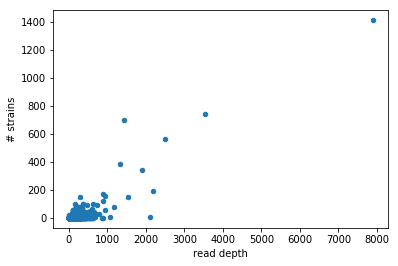

In [4]:
ax = dfa.plot('A_read_depth', 'A_strains', kind='scatter')
ax.set(ylabel="# strains", xlabel="read depth")

Note that this plot is skewed by a few outliers. Lets limit it to anything where read_depth < 1000 and redraw the plot

Shape: (1386, 7)


[Text(0, 0.5, '# strains'), Text(0.5, 0, 'read depth')]

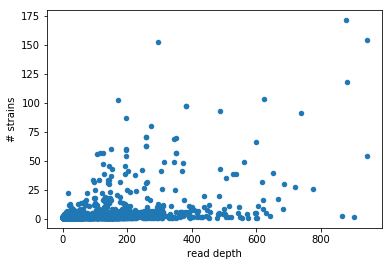

In [5]:
dfas = dfa[dfa['A_read_depth'] < 1000]
print("Shape: {}".format(dfas.shape))
ax = dfas.plot('A_read_depth', 'A_strains', kind='scatter')
ax.set(ylabel="# strains", xlabel="read depth")

When we zoom in, this doesn't look like a strong correlation. Note that there are a lot of data points here compared to the whole data set. In the data set excluding (0,0) we had 1,397 entries, and now we have 1,386 entries, so we only removed 9 values!


# Linear regression

What is the correlation between these two data sets. Note that we use the data with all the non-zero's removed (1,397 data points).

As a reminder, the statsmodels OLS uses y ~ x

In [6]:
model = sm.OLS(dfa['A_strains'], dfa['A_read_depth']).fit()
predictions = model.predict(dfa['A_read_depth'])
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              A_strains   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     3005.
Date:                Mon, 07 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:43:33   Log-Likelihood:                -6738.0
No. Observations:                1397   AIC:                         1.348e+04
Df Residuals:                    1396   BIC:                         1.348e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
A_read_depth     0.1345      0.002     54.817      0.000       0.130       0.139
==============================================================================
Omnibus:                     1781.160   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           773624.427
Skew:                           6.310   Prob(JB):                         0.00
Kurtosis:                     117.592   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Removing the outliers

Remember the *nine* outliers above? If we use the data set where we have removed them, we can compare the r<sup>2</sup> value for that dataset.

In [7]:
model = sm.OLS(dfas['A_strains'], dfas['A_read_depth']).fit()
predictions = model.predict(dfas['A_read_depth'])
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              A_strains   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     609.9
Date:                Tue, 08 Jan 2019   Prob (F-statistic):          6.95e-112
Time:                        21:43:53   Log-Likelihood:                -5455.8
No. Observations:                1386   AIC:                         1.091e+04
Df Residuals:                    1385   BIC:                         1.092e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
A_read_depth     0.0443      0.002     24.697      0.000       0.041       0.048
==============================================================================
Omnibus:                     1414.070   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83828.084
Skew:                           4.877   Prob(JB):                         0.00
Kurtosis:                      39.830   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notice here that the r<sup>2</sup> becomes **0.30**. Those few outliers are strongly influencing the correlation of the data!